In [2]:
from problems import GridworldProblem

Path found with 16 steps


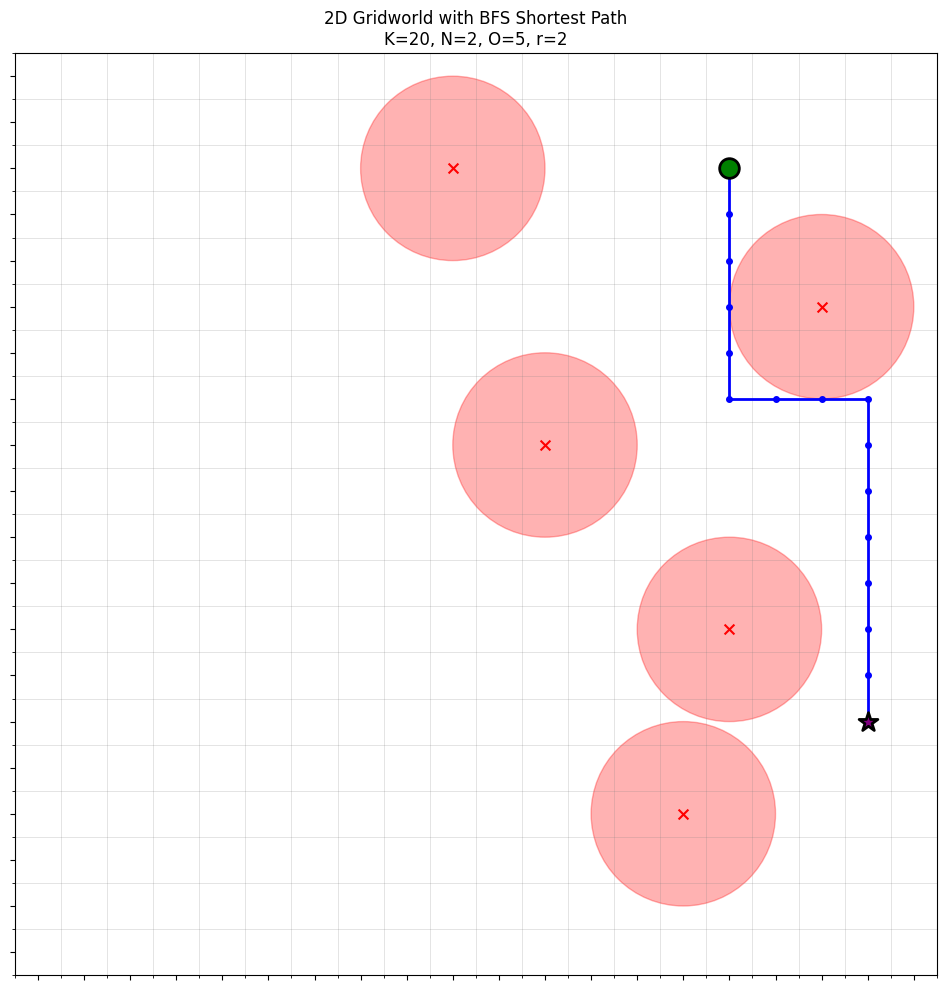

Obstacle centers: [[17 14]
 [14  3]
 [15  7]
 [11 11]
 [ 9 17]]
Start: [15 17], Goal: [18  5]
Path length: 16 steps, Manhattan distance: 15
Reached goal: True


In [81]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

K = 20
N = 2
O = 5
r = 2
env = GridworldProblem(K=K, N=N, O=O, r=r)

# Generate random start and goal that are valid (not in obstacles)
def is_valid_state(state, obstacles, r):
    """Check if state is not inside any obstacle"""
    for obs in obstacles:
        if np.linalg.norm(state - obs) < r:
            return False
    return True

# Find valid start
while True:
    start = np.random.randint(0, K, size=2)
    if is_valid_state(start.astype(float), env.obstacles, r):
        break

# Find valid goal
while True:
    goal = np.random.randint(0, K, size=2)
    if is_valid_state(goal.astype(float), env.obstacles, r):
        break

# BFS to find shortest path
def bfs_path(start, goal, K, obstacles, r):
    """Find shortest path using BFS"""
    queue = deque([(tuple(start), [start.copy()])])
    visited = {tuple(start)}
    
    directions = [np.array([1, 0]), np.array([-1, 0]), 
                  np.array([0, 1]), np.array([0, -1])]
    
    while queue:
        current_pos, path = queue.popleft()
        current = np.array(current_pos)
        
        # Check if we reached the goal
        if np.array_equal(current, goal):
            return np.array(path)
        
        # Try all directions
        for direction in directions:
            next_pos = current + direction
            
            # Check bounds
            if next_pos[0] < 0 or next_pos[0] >= K or next_pos[1] < 0 or next_pos[1] >= K:
                continue
            
            next_tuple = tuple(next_pos)
            
            # Check if already visited
            if next_tuple in visited:
                continue
            
            # Check if valid (not in obstacle)
            if is_valid_state(next_pos.astype(float), obstacles, r):
                visited.add(next_tuple)
                new_path = path + [next_pos.copy()]
                queue.append((next_tuple, new_path))
    
    # No path found
    return None

path = bfs_path(start, goal, K, env.obstacles, r)

if path is None:
    print("No valid path found!")
    path = np.array([start, goal])
else:
    print(f"Path found with {len(path)} steps")

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))

# Set limits and aspect
ax.set_xlim(-0.5, K - 0.5)
ax.set_ylim(-0.5, K - 0.5)
ax.set_aspect('equal', adjustable='box')

# Set grid with proper spacing
ax.set_xticks(np.arange(0, K, 1))
ax.set_yticks(np.arange(0, K, 1))
ax.set_xticks(np.arange(-0.5, K, 1), minor=True)
ax.set_yticks(np.arange(-0.5, K, 1), minor=True)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
ax.grid(which='major', color='gray', linestyle='-', linewidth=0, alpha=0)

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Draw obstacles
for i, obstacle in enumerate(env.obstacles):
    circle = plt.Circle(obstacle, r, color='red', alpha=0.3)
    ax.add_patch(circle)
    # Mark obstacle center
    ax.scatter(obstacle[0], obstacle[1], c='red', s=50, marker='x', zorder=5)

# Draw path
ax.plot(path[:, 0], path[:, 1], color='blue', linewidth=2, marker='o', markersize=4, zorder=3)

# Mark start and goal
ax.scatter(start[0], start[1], c='green', s=200, marker='o', edgecolors='black', linewidths=2, zorder=10)
ax.scatter(goal[0], goal[1], c='purple', s=200, marker='*', edgecolors='black', linewidths=2, zorder=10)

ax.set_title(f'2D Gridworld with BFS Shortest Path\nK={K}, N={N}, O={O}, r={r}')
plt.tight_layout()
plt.show()

print(f"Obstacle centers: {env.obstacles}")
print(f"Start: {start}, Goal: {goal}")
print(f"Path length: {len(path)} steps, Manhattan distance: {abs(goal[0]-start[0]) + abs(goal[1]-start[1])}")
print(f"Reached goal: {np.array_equal(path[-1], goal)}")

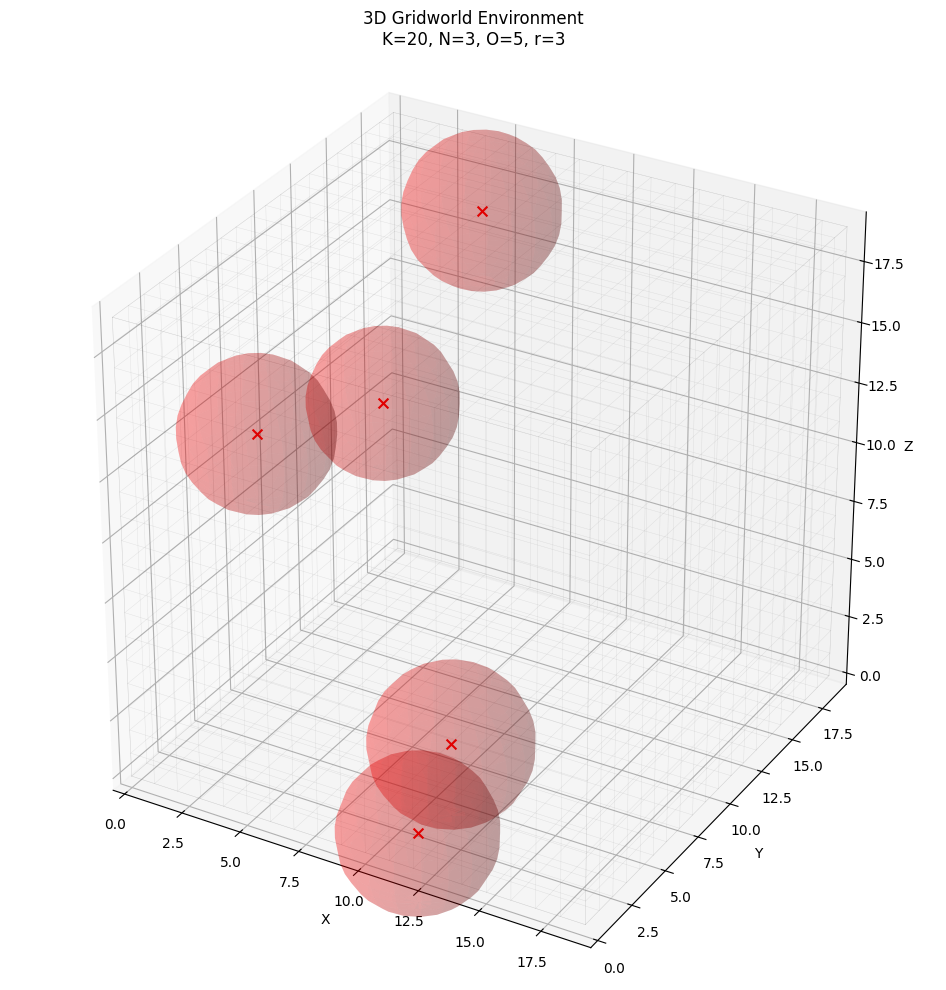

Obstacle centers: [[ 0  9 10]
 [ 5 17 17]
 [11  2  0]
 [ 0 18  7]
 [13  1  5]]


In [55]:
# 3D Gridworld
K3 = 20
N3 = 3
O3 = 5
r3 = 3
env3 = GridworldProblem(K=K3, N=N3, O=O3, r=r3)

# Create 3D figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Set limits and aspect
ax.set_xlim(-0.5, K3 - 0.5)
ax.set_ylim(-0.5, K3 - 0.5)
ax.set_zlim(-0.5, K3 - 0.5)
ax.set_box_aspect([1, 1, 1])

# Draw grid on each face
# XY plane grids at z=0 and z=K3
for z in [0, K3-1]:
    for i in range(K3):
        ax.plot([i, i], [0, K3-1], [z, z], color='gray', linewidth=0.3, alpha=0.2)
        ax.plot([0, K3-1], [i, i], [z, z], color='gray', linewidth=0.3, alpha=0.2)

# XZ plane grids at y=0 and y=K3
for y in [0, K3-1]:
    for i in range(K3):
        ax.plot([i, i], [y, y], [0, K3-1], color='gray', linewidth=0.3, alpha=0.2)
        ax.plot([0, K3-1], [y, y], [i, i], color='gray', linewidth=0.3, alpha=0.2)

# YZ plane grids at x=0 and x=K3
for x in [0, K3-1]:
    for i in range(K3):
        ax.plot([x, x], [i, i], [0, K3-1], color='gray', linewidth=0.3, alpha=0.2)
        ax.plot([x, x], [0, K3-1], [i, i], color='gray', linewidth=0.3, alpha=0.2)

# Draw obstacles as spheres
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)
for i, obstacle in enumerate(env3.obstacles):
    x_sphere = r3 * np.outer(np.cos(u), np.sin(v)) + obstacle[0]
    y_sphere = r3 * np.outer(np.sin(u), np.sin(v)) + obstacle[1]
    z_sphere = r3 * np.outer(np.ones(np.size(u)), np.cos(v)) + obstacle[2]
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.2)
    # Mark obstacle center
    ax.scatter(obstacle[0], obstacle[1], obstacle[2], c='red', s=50, marker='x')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'3D Gridworld Environment\nK={K3}, N={N3}, O={O3}, r={r3}')
plt.tight_layout()
plt.show()

print(f"Obstacle centers: {env3.obstacles}")

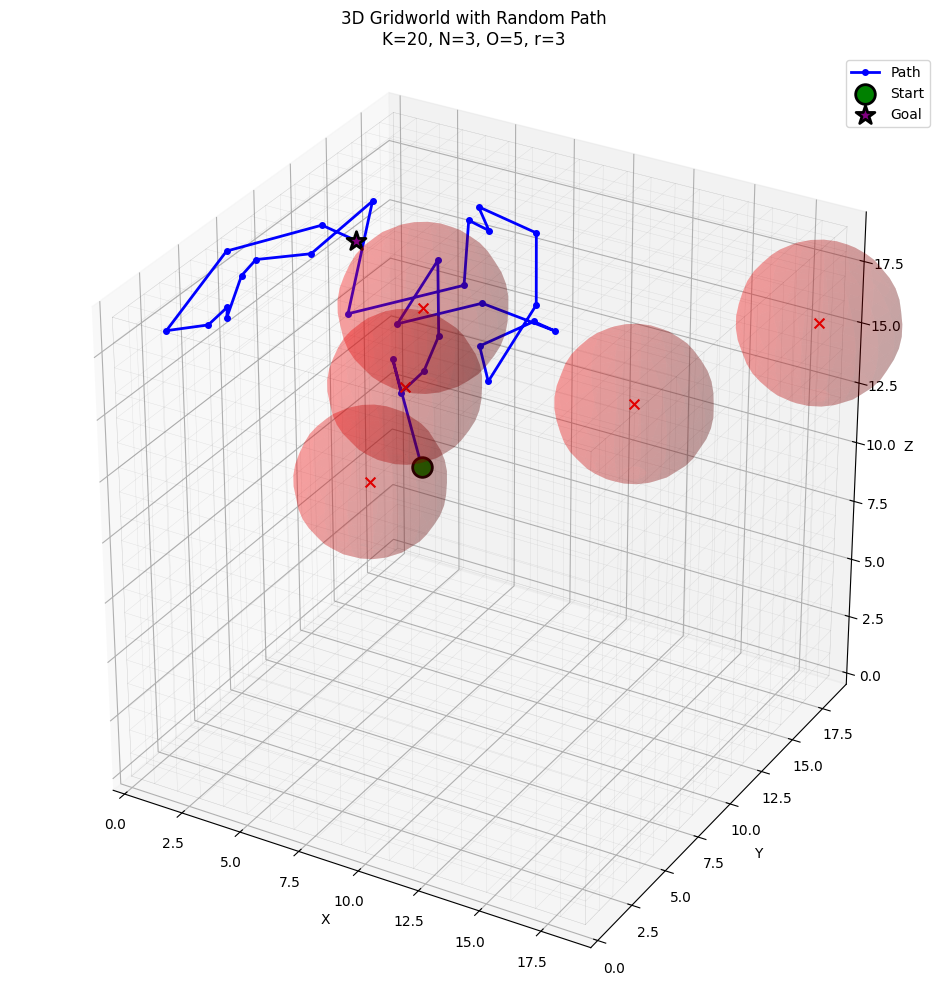

Obstacle centers: [[ 1 18  8]
 [ 0 17  4]
 [19 17 16]
 [11 18 10]
 [ 9  6 19]]
Path length: 30 points


In [ ]:
# 3D Gridworld with BFS shortest path
K3 = 20
N3 = 3
O3 = 5
r3 = 3
env3 = GridworldProblem(K=K3, N=N3, O=O3, r=r3)

# Find valid start
while True:
    start3 = np.random.randint(0, K3, size=3)
    if is_valid_state(start3.astype(float), env3.obstacles, r3):
        break

# Find valid goal
while True:
    goal3 = np.random.randint(0, K3, size=3)
    if is_valid_state(goal3.astype(float), env3.obstacles, r3):
        break

# BFS to find shortest path in 3D
def bfs_path_3d(start, goal, K, obstacles, r):
    """Find shortest path using BFS in 3D"""
    queue = deque([(tuple(start), [start.copy()])])
    visited = {tuple(start)}
    
    directions = [np.array([1, 0, 0]), np.array([-1, 0, 0]), 
                  np.array([0, 1, 0]), np.array([0, -1, 0]),
                  np.array([0, 0, 1]), np.array([0, 0, -1])]
    
    while queue:
        current_pos, path = queue.popleft()
        current = np.array(current_pos)
        
        # Check if we reached the goal
        if np.array_equal(current, goal):
            return np.array(path)
        
        # Try all directions
        for direction in directions:
            next_pos = current + direction
            
            # Check bounds
            if (next_pos[0] < 0 or next_pos[0] >= K or 
                next_pos[1] < 0 or next_pos[1] >= K or
                next_pos[2] < 0 or next_pos[2] >= K):
                continue
            
            next_tuple = tuple(next_pos)
            
            # Check if already visited
            if next_tuple in visited:
                continue
            
            # Check if valid (not in obstacle)
            if is_valid_state(next_pos.astype(float), obstacles, r):
                visited.add(next_tuple)
                new_path = path + [next_pos.copy()]
                queue.append((next_tuple, new_path))
    
    # No path found
    return None

path3 = bfs_path_3d(start3, goal3, K3, env3.obstacles, r3)

if path3 is None:
    print("No valid path found!")
    path3 = np.array([start3, goal3])
else:
    print(f"Path found with {len(path3)} steps")

# Create 3D figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Set limits and aspect
ax.set_xlim(-0.5, K3 - 0.5)
ax.set_ylim(-0.5, K3 - 0.5)
ax.set_zlim(-0.5, K3 - 0.5)
ax.set_box_aspect([1, 1, 1])

# Draw grid on each face
# XY plane grids at z=0 and z=K3
for z in [0, K3-1]:
    for i in range(K3):
        ax.plot([i, i], [0, K3-1], [z, z], color='gray', linewidth=0.3, alpha=0.2)
        ax.plot([0, K3-1], [i, i], [z, z], color='gray', linewidth=0.3, alpha=0.2)

# XZ plane grids at y=0 and y=K3
for y in [0, K3-1]:
    for i in range(K3):
        ax.plot([i, i], [y, y], [0, K3-1], color='gray', linewidth=0.3, alpha=0.2)
        ax.plot([0, K3-1], [y, y], [i, i], color='gray', linewidth=0.3, alpha=0.2)

# YZ plane grids at x=0 and x=K3
for x in [0, K3-1]:
    for i in range(K3):
        ax.plot([x, x], [i, i], [0, K3-1], color='gray', linewidth=0.3, alpha=0.2)
        ax.plot([x, x], [0, K3-1], [i, i], color='gray', linewidth=0.3, alpha=0.2)

# Draw obstacles as spheres
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)
for i, obstacle in enumerate(env3.obstacles):
    x_sphere = r3 * np.outer(np.cos(u), np.sin(v)) + obstacle[0]
    y_sphere = r3 * np.outer(np.sin(u), np.sin(v)) + obstacle[1]
    z_sphere = r3 * np.outer(np.ones(np.size(u)), np.cos(v)) + obstacle[2]
    ax.plot_surface(x_sphere, y_sphere, z_sphere, color='red', alpha=0.2)
    # Mark obstacle center
    ax.scatter(obstacle[0], obstacle[1], obstacle[2], c='red', s=50, marker='x')

# Draw path
ax.plot(path3[:, 0], path3[:, 1], path3[:, 2], color='blue', linewidth=2, marker='o', markersize=4, label='Path')
# Mark start and end
ax.scatter(start3[0], start3[1], start3[2], c='green', s=200, marker='o', edgecolors='black', linewidths=2, label='Start')
ax.scatter(goal3[0], goal3[1], goal3[2], c='purple', s=200, marker='*', edgecolors='black', linewidths=2, label='Goal')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'3D Gridworld with BFS Shortest Path\nK={K3}, N={N3}, O={O3}, r={r3}')
ax.legend()
plt.tight_layout()
plt.show()

print(f"Obstacle centers: {env3.obstacles}")
print(f"Start: {start3}, Goal: {goal3}")
print(f"Path length: {len(path3)} steps, Manhattan distance: {abs(goal3[0]-start3[0]) + abs(goal3[1]-start3[1]) + abs(goal3[2]-start3[2])}")
print(f"Reached goal: {np.array_equal(path3[-1], goal3)}")